### Step-histograms to investigate threshold properties:

- __CME Speed__ 
    - SMART Total Area
    - SMART R-value
    
    
- __GOES Peak Flare Flux__ 
    - SMART Total Area
    - SMART Total Flux
    - SMART Total Area
    - SMART WL$_{\text{SG}}$

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
# Defining the path for the dataframe
custom_df = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe
df = pd.read_pickle(custom_df)

In [3]:
# Function to automate splitting up the GOES flux 

def goes_flux(df, flux_column):
    a = df[ (flux_column < -7.0) ]  
    b = df[ (flux_column >= -7.0) & (flux_column < -6.0) ]  
    c = df[ (flux_column >= -6.0) & (flux_column < -5.0) ]  
    m = df[ (flux_column >= -5.0) & (flux_column < -4.0) ]  
    x = df[ (flux_column >= -4.0) ]
    
    return a, b, c, m, x

In [4]:
# CME speeds
dfsp = df[['cme_speed', 'smart_total_area', 'smart_r_value', 'smart_total_flux']]

# Removing the rows containing any NaN values
dfsp = dfsp.dropna(how='any')

# Reindexing
dfsp = dfsp.reset_index(drop=True)

# Converting from m.s.m to cm^2 (1 m.s.h = 3.0E16 cm^2)
#dfsp.smart_total_area = dfsp.smart_total_area.values*3.0E16

# Splitting up the CME speeds
s1 = dfsp[ (dfsp.cme_speed > 0) & (dfsp.cme_speed < 1000) ]  
s2 = dfsp[ (dfsp.cme_speed >= 1000) & (dfsp.cme_speed < 2000) ]  
s3 = dfsp[ (dfsp.cme_speed >= 2000) & (dfsp.cme_speed < 3000) ]  
s4 = dfsp[ (dfsp.cme_speed >= 3000) ]


#==== FLARES ======================================================================================================

# R-value histogram
dfq = df[['goes_flux', 'smart_r_value']]

# Removing the rows containing any NaN values
dfq = dfq.dropna(how='any')

# Reindexing
dfq = dfq.reset_index(drop=True)

# Splitting up the different GOES classes for this dataframe
dfq.goes_flux = np.log10(dfq.goes_flux)
aq, bq, cq, mq, xq = goes_flux(dfq, dfq.goes_flux)  

#==================================================================================================================

# Total flux histogram
df2 = df[['goes_flux', 'smart_total_flux']]
df2 = df2.dropna(how='any')
df2 = df2.reset_index(drop=True)

# Splitting up the different GOES classes for this dataframe
df2.goes_flux = np.log10(df2.goes_flux)
af, bf, cf, mf, xf = goes_flux(df2, df2.goes_flux)  

#==================================================================================================================

# WLSG histogram
dfw = df[['goes_flux', 'smart_wlsg']]
dfw = dfw.dropna(how='any')
dfw = dfw[(dfw[['smart_wlsg']] != 0).all(axis=1)]
dfw = dfw.reset_index(drop=True)

# Splitting up the different GOES classes for this dataframe
dfw.goes_flux = np.log10(dfw.goes_flux)
aw, bw, cw, mw, xw = goes_flux(dfw, dfw.goes_flux) 

#==================================================================================================================

# SRS area histogram
dfsm = df[['goes_flux', 'smart_total_area']]

# Removing the rows containing any NaN values
dfsm = dfsm.dropna(how='any')

# Reindexing
dfsm = dfsm.reset_index(drop=True)

# Splitting up the different GOES classes for this new dataframe
dfsm.goes_flux = np.log10(dfsm.goes_flux)
a2, b2, c2, m2, x2 = goes_flux(dfsm, dfsm.goes_flux)  

# Converting from m.s.h to cm^2 (1 m.s.h = 3.0E16 cm^2)
#a2cm = a2.smart_total_area.values*3.0E16
#b2cm = b2.smart_total_area.values*3.0E16
#c2cm = c2.smart_total_area.values*3.0E16
#m2cm = m2.smart_total_area.values*3.0E16
#x2cm = x2.smart_total_area.values*3.0E16

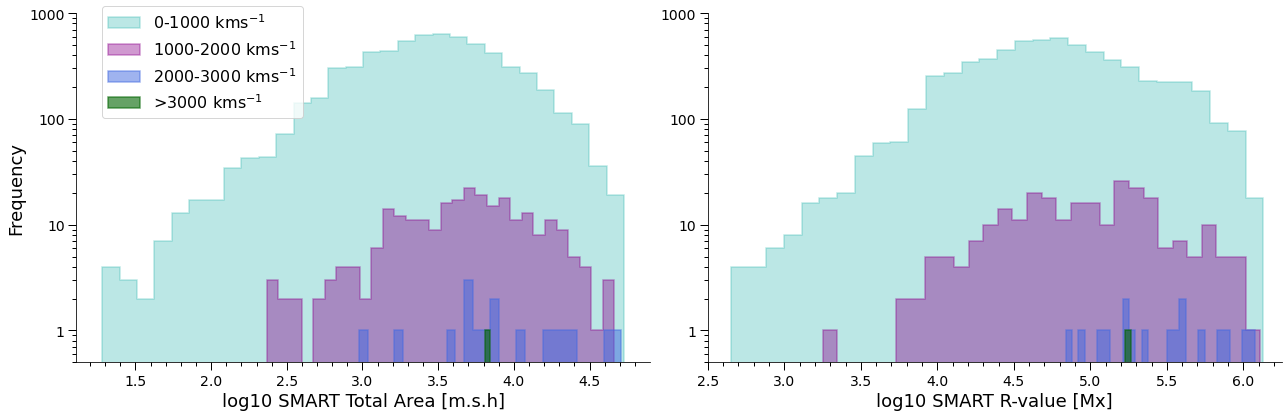

In [5]:
# Plotting CME step-hists
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey='row', facecolor='white')
fig1.subplots_adjust(wspace=0.15)

# Sunspot area with relation to CME speed 
na, ba, pa = ax1.hist(np.log10(s1.smart_total_area), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax1.hist(np.log10(s2.smart_total_area), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax1.hist(np.log10(s3.smart_total_area), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax1.hist(np.log10(s4.smart_total_area), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.legend(loc=[0.045,0.70], fontsize=16)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


# R-value with relation to CME speed
na, ba, pa = ax2.hist(np.log10(s1.smart_r_value), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax2.hist(np.log10(s2.smart_r_value), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax2.hist(np.log10(s3.smart_r_value), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax2.hist(np.log10(s4.smart_r_value), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax2.set_yscale('log')
ax2.set_xlim([2.5,6.25])
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART R-value [Mx]', fontsize=18)
#ax2.legend(loc=[0.05,0.70], fontsize=16)

ax2.yaxis.set_tick_params(labelleft=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()
#plt.savefig('speed_step.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

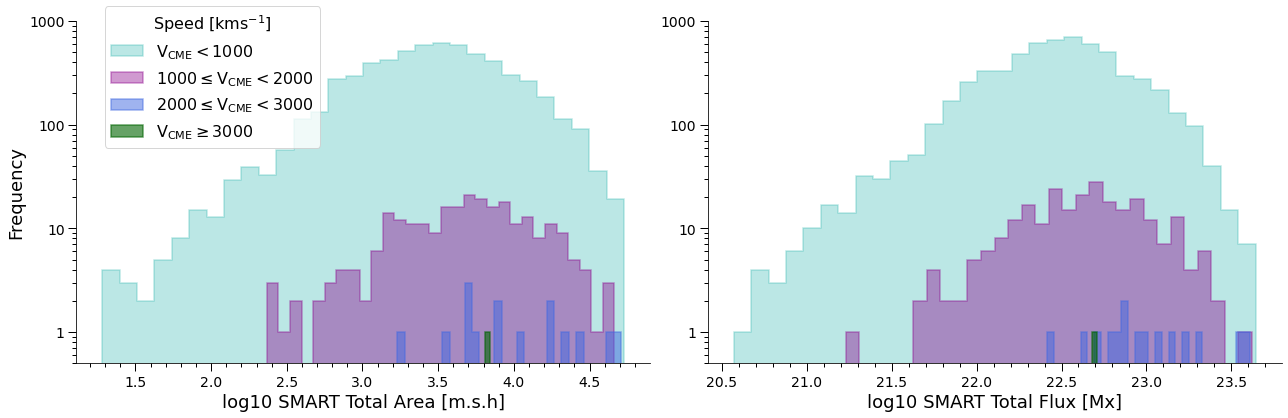

In [23]:
# Plotting CME step-hists
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey='row', facecolor='white')
fig1.subplots_adjust(wspace=0.15)

# Sunspot area with relation to CME speed 
na, ba, pa = ax1.hist(np.log10(s1.smart_total_area), 30, histtype='stepfilled',
                      ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3,
                      label=r'$\mathrm{V}_{\mathrm{CME}} < 1000$')

nb, bb, pb = ax1.hist(np.log10(s2.smart_total_area), 30, histtype='stepfilled',
                      ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4,
                      label=r'$1000 \leq \mathrm{V}_{\mathrm{CME}} < 2000$')

nc, bc, pc = ax1.hist(np.log10(s3.smart_total_area), 30, histtype='stepfilled',
                      ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5,
                      label=r'$2000 \leq \mathrm{V}_{\mathrm{CME}} < 3000$')

nm, bm, pm = ax1.hist(np.log10(s4.smart_total_area), 30, histtype='stepfilled',
                      ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6,
                      label=r'$\mathrm{V}_{\mathrm{CME}} \geq 3000$')

#\mathrm{V}_{\mathrm{CME}}

ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
leg = ax1.legend(loc=[0.05,0.63], fontsize=16, title='Speed [kms$^{-1}$]', title_fontsize=16)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


# R-value with relation to CME speed
na, ba, pa = ax2.hist(np.log10(s1.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3)
nb, bb, pb = ax2.hist(np.log10(s2.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4)
nc, bc, pc = ax2.hist(np.log10(s3.smart_total_flux), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5)
nm, bm, pm = ax2.hist(np.log10(s4.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6)

ax2.set_yscale('log')
#ax2.set_xlim([2.5,6.25])
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=18)
#ax2.legend(loc=[0.05,0.70], fontsize=16)

ax2.yaxis.set_tick_params(labelleft=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()
#plt.savefig('speed_step_flux_v3.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [7]:
# bins
b1 = (max(s1.smart_total_area) - min(s1.smart_total_area))/30
b2 = (max(s1.smart_total_flux) - min(s1.smart_total_flux))/30

print(b1,b2)

1778.2853333333335 1.4621733333333334e+22


In [8]:
# bins
print("\nArea bins in order:\n",round((max(s1.smart_total_area)-min(s1.smart_total_area))/30),"\n", 
      round((max(s2.smart_total_area)-min(s2.smart_total_area))/30),"\n", 
      round((max(s3.smart_total_area)-min(s3.smart_total_area))/30),"\n", 
      round((max(s4.smart_total_area))/30))

print("\nFlux bins in order:\n",(max(s1.smart_total_flux)-min(s1.smart_total_flux))/30,"\n", 
      (max(s2.smart_total_flux)-min(s2.smart_total_flux))/30,"\n", 
      (max(s3.smart_total_flux)-min(s3.smart_total_flux))/30,"\n", 
      (max(s4.smart_total_flux))/30)


Area bins in order:
 1778 
 1532 
 1672 
 214

Flux bins in order:
 1.4621733333333334e+22 
 1.3876999999999999e+22 
 1.2929999999999997e+22 
 1.5866666666666668e+21


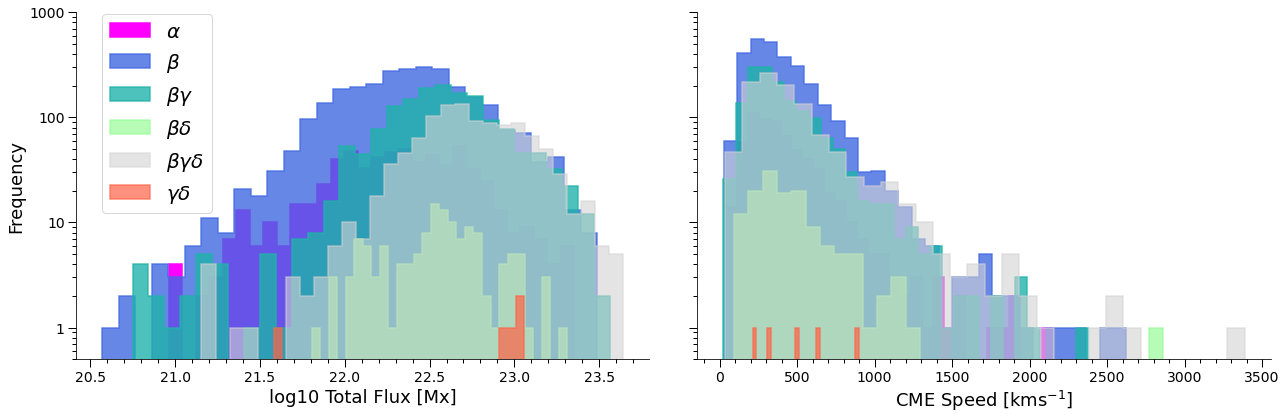

In [14]:
#=== Hale CLass 
dfs = df[['srs_hale', 'smart_total_area', 'cme_speed', 'smart_total_flux']]

# Removing the rows containing any NaN values
dfs = dfs.dropna(how='any')

# Reindexing
dfs = dfs.reset_index(drop=True)

# Separate each class 
a = dfs.loc[dfs['srs_hale'] == 1.0]     # alpha
b = dfs.loc[dfs['srs_hale'] == 2.0]     # beta
bg = dfs.loc[dfs['srs_hale'] == 3.0]    # beta-gamma
bd = dfs.loc[dfs['srs_hale'] == 4.0]    # beta-delta
bgd = dfs.loc[dfs['srs_hale'] == 5.0]   # beta-gamma-delta
gd = dfs.loc[dfs['srs_hale'] == 6.0]    # gamma-delta

# Splitting up the CME speeds
s1 = dfs[ (dfs.cme_speed > 0)    & (dfs.cme_speed <= 1000) ]  
s2 = dfs[ (dfs.cme_speed > 1000) & (dfs.cme_speed <= 2000) ]  
s3 = dfs[ (dfs.cme_speed > 2000) & (dfs.cme_speed <= 3000) ]  
s4 = dfs[ (dfs.cme_speed > 3000) ]

#=== Plotting 
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey='row', facecolor='white')
#fig1.subplots_adjust(wspace=0.15)

# area 
n1, b1, p1 = ax1.hist(np.log10(a.smart_total_flux), 30, histtype='stepfilled',
                         ec='fuchsia', fc='fuchsia', lw=1.5, alpha=1, label=r'$\alpha$')
n2, b2, p2 = ax1.hist(np.log10(b.smart_total_flux), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax1.hist(np.log10(bg.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax1.hist(np.log10(bd.smart_total_flux), 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax1.hist(np.log10(bgd.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')
n6, b6, p6 = ax1.hist(np.log10(gd.smart_total_flux), 30, histtype='stepfilled',
                         ec='tomato', fc='tomato', lw=1.5, alpha=0.7, label=r'$\gamma \delta$')

ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

#ax1.set_xlabel('log10 Total Area [m.s.h]', fontsize=18)
ax1.set_xlabel('log10 Total Flux [Mx]', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.legend(loc=[0.045,0.42], fontsize=20)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


# speed
n1, b1, p1 = ax2.hist(a.cme_speed, 30, histtype='stepfilled',
                         ec='fuchsia', fc='fuchsia', lw=1.5, alpha=1, label=r'$\alpha$')
n2, b2, p2 = ax2.hist(b.cme_speed, 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax2.hist(bg.cme_speed, 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax2.hist(bd.cme_speed, 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax2.hist(bgd.cme_speed, 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')
n6, b6, p6 = ax2.hist(gd.cme_speed, 30, histtype='stepfilled',
                         ec='tomato', fc='tomato', lw=1.5, alpha=0.7, label=r'$\gamma \delta$')

ax2.set_yscale('log')
#ax2.set_xlim([2.5,6.25])
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('CME Speed [kms$^{-1}$]', fontsize=18)

#ax2.yaxis.set_tick_params(labelleft=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(100))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout(w_pad=4)
#plt.savefig('hale_step.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [27]:
# bins
print("\nFlux bins in order:\n",(max(a.smart_total_flux)-min(a.smart_total_flux)/30),"\n", 
      (max(b.smart_total_flux)-min(b.smart_total_flux)/30),"\n", 
      (max(bg.smart_total_flux)-min(bg.smart_total_flux)/30),"\n", 
      (max(bd.smart_total_flux)-min(bd.smart_total_flux)/30),"\n", 
      (max(bgd.smart_total_flux)-min(bgd.smart_total_flux)/30),"\n", 
      (max(gd.smart_total_flux)-min(gd.smart_total_flux)/30))

print("\nSpeed bins in order:\n",round(max(a.cme_speed)-min(a.cme_speed)/30),"\n", 
      round(max(b.cme_speed)-min(b.cme_speed)/30),"\n", 
      round(max(bg.cme_speed)-min(bg.cme_speed)/30),"\n", 
      round(max(bd.cme_speed)-min(bd.cme_speed)/30),"\n", 
      round(max(bgd.cme_speed)-min(bgd.cme_speed)/30),"\n", 
      round(max(gd.cme_speed)-min(gd.cme_speed)/30))


Flux bins in order:
 2.249694e+23 
 3.079876e+23 
 3.659813e+23 
 2.0478766666666666e+23 
 4.3895233333333335e+23 
 1.1387299999999999e+23

Speed bins in order:
 2146 
 2624 
 2377 
 2858 
 3386 
 890


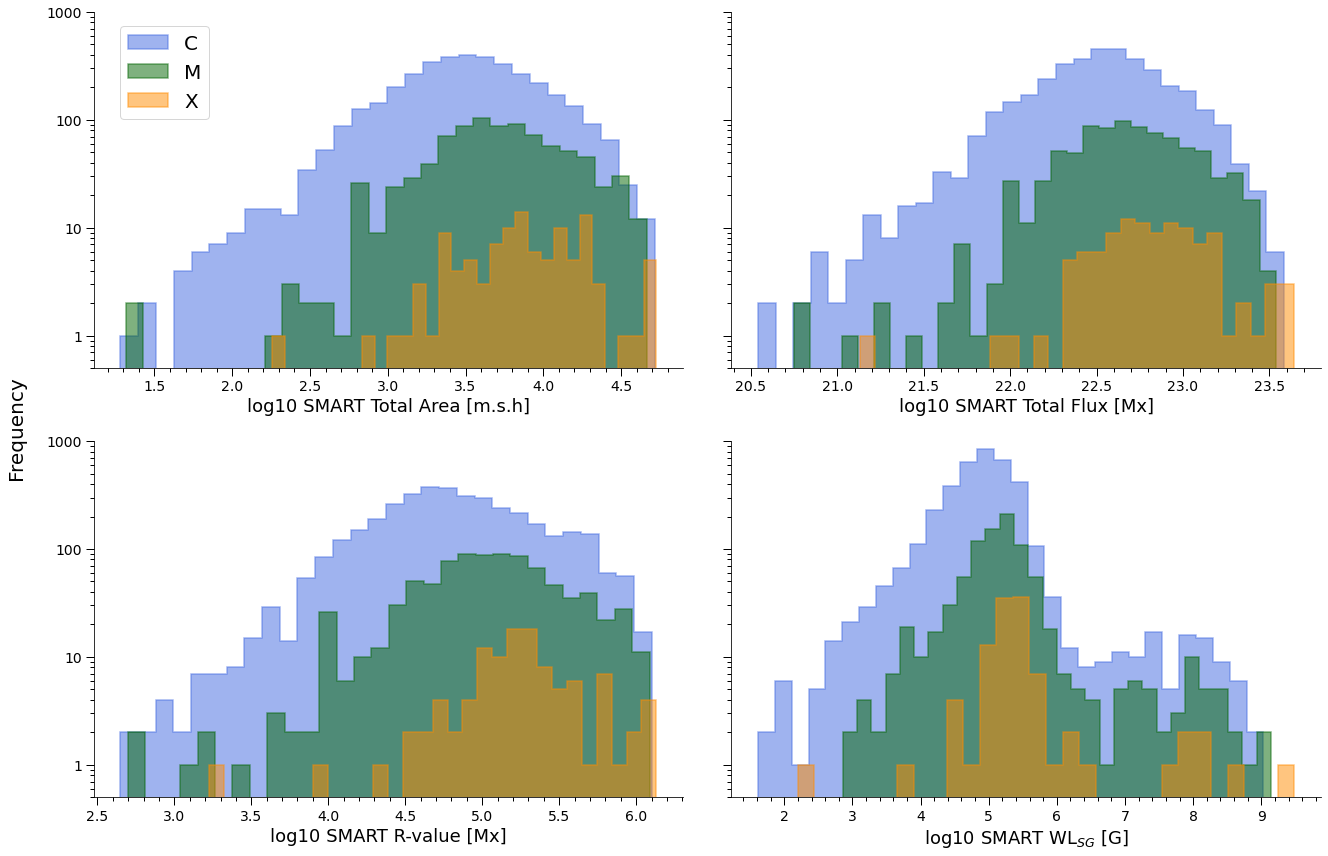

In [13]:
# Plotting flare step-hists
fig2, ((ax3, ax4), (ax5, ax6)) = plt.subplots(2, 2, figsize=(18, 12), sharey='row', facecolor='white')

# Area
nc, bc, pc = ax3.hist(np.log10(c2.smart_total_area), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax3.hist(np.log10(m2.smart_total_area), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax3.hist(np.log10(x2.smart_total_area), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax3.set_yscale('log')
ax3.set_ylim([0.5,1000])
ax3.set_yticks([1, 10, 100, 1000])
ax3.set_yticklabels(['1', '10', '100', '1000'])

ax3.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
ax3.legend(loc=[0.045,0.70], fontsize=20)

plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)

ax3.xaxis.set_minor_locator(MultipleLocator(0.1))
ax3.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax3.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)


# Total flux
nc, bc, pc = ax4.hist(np.log10(cf.smart_total_flux), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax4.hist(np.log10(mf.smart_total_flux), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax4.hist(np.log10(xf.smart_total_flux), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax4.set_yscale('log')
ax4.set_ylim([0.5,1000])
ax4.set_yticks([1, 10, 100, 1000])
ax4.set_yticklabels(['1', '10', '100', '1000'])

ax4.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=18)
#ax4.legend(loc=[0.045,0.75], fontsize=18)

#ax4.yaxis.set_tick_params(labelleft=True)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)

ax4.xaxis.set_minor_locator(MultipleLocator(0.1))
ax4.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax4.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)


# R-values
nc, bc, pc = ax5.hist(np.log10(cq.smart_r_value), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax5.hist(np.log10(mq.smart_r_value), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax5.hist(np.log10(xq.smart_r_value), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax5.set_yscale('log')
ax5.set_ylim([0.5,1000])
ax5.set_yticks([1, 10, 100, 1000])
ax5.set_yticklabels(['1', '10', '100', '1000'])

ax5.set_xlabel('log10 SMART R-value [Mx]', fontsize=18)
#ax5.legend(loc=[0.045,0.75], fontsize=18)

ax5.yaxis.set_tick_params(labelleft=True)
plt.setp(ax5.get_xticklabels(), fontsize=14)
plt.setp(ax5.get_yticklabels(), fontsize=14)

ax5.xaxis.set_minor_locator(MultipleLocator(0.1))
ax5.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax5.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)


# WLSG
nc, bc, pc = ax6.hist(np.log10(cw.smart_wlsg), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax6.hist(np.log10(mw.smart_wlsg), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax6.hist(np.log10(xw.smart_wlsg), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax6.set_yscale('log')
ax6.set_ylim([0.5,1000])
ax6.set_yticks([1, 10, 100, 1000])
ax6.set_yticklabels(['1', '10', '100', '1000'])

ax6.set_xlabel('log10 SMART WL$_{SG}$ [G]', fontsize=18)
#ax6.legend(loc=[0.045,0.75], fontsize=18)

#ax6.yaxis.set_tick_params(labelleft=True)
plt.setp(ax6.get_xticklabels(), fontsize=14)
plt.setp(ax6.get_yticklabels(), fontsize=14)

ax6.xaxis.set_minor_locator(MultipleLocator(0.2))
ax6.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax6.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)

fig2.text(-0.022, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=20)

plt.tight_layout(w_pad=4, h_pad=2)
#plt.savefig('flux_step.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [8]:
# bins
print("\nArea bins in order:\n",(max(c2.smart_total_area)-min(c2.smart_total_area)/30),"\n", 
      (max(m2.smart_total_area)-min(m2.smart_total_area)/30),"\n", 
      (max(x2.smart_total_area)-min(x2.smart_total_area)/30))

print("\nFlux bins in order:\n",(max(cf.smart_total_flux)-min(cf.smart_total_flux)/30),"\n", 
      (max(mf.smart_total_flux)-min(mf.smart_total_flux)/30),"\n", 
      (max(xf.smart_total_flux)-min(xf.smart_total_flux)/30))

print("\nR value bins in order:\n",(max(cq.smart_r_value)-min(cq.smart_r_value)/30),"\n", 
      (max(mq.smart_r_value)-min(mq.smart_r_value)/30),"\n", 
      (max(xq.smart_r_value)-min(xq.smart_r_value)/30))

print("\nWLSG bins in order:\n",(max(cw.smart_wlsg)-min(cw.smart_wlsg)/30),"\n", 
      (max(mw.smart_wlsg)-min(mw.smart_wlsg)/30),"\n", 
      (max(xw.smart_wlsg)-min(xw.smart_wlsg)/30))


Area bins in order:
 51895.24366666666 
 46200.54166666667 
 53361.635

Flux bins in order:
 3.8298839999999995e+23 
 3.429813e+23 
 4.389546666666667e+23

R value bins in order:
 1260641.8833333333 
 1219681.4200000002 
 1351816.35

WLSG bins in order:
 1073870974.6286666 
 1380554855.9676666 
 3032590586.7176666


## Extra things

In [6]:
# CME speeds - wlsg and psl length has 122 less values
dfsp2 = df[['cme_speed', 'smart_psl_length', 'smart_wlsg']]

# Removing the rows containing any NaN values
dfsp2 = dfsp2.dropna(how='any')        
dfsp2 = dfsp2[(dfsp2[['smart_psl_length']] != 0).all(axis=1)]
dfsp2 = dfsp2[(dfsp2[['smart_wlsg']] != 0).all(axis=1)]

# Reindexing
dfsp2 = dfsp2.reset_index(drop=True)

# Splitting up the CME speeds
s12 = dfsp2[ (dfsp2.cme_speed > 0)    & (dfsp2.cme_speed <= 1000) ]  
s22 = dfsp2[ (dfsp2.cme_speed > 1000) & (dfsp2.cme_speed <= 2000) ]  
s32 = dfsp2[ (dfsp2.cme_speed > 2000) & (dfsp2.cme_speed <= 3000) ]  
s42 = dfsp2[ (dfsp2.cme_speed > 3000) ]

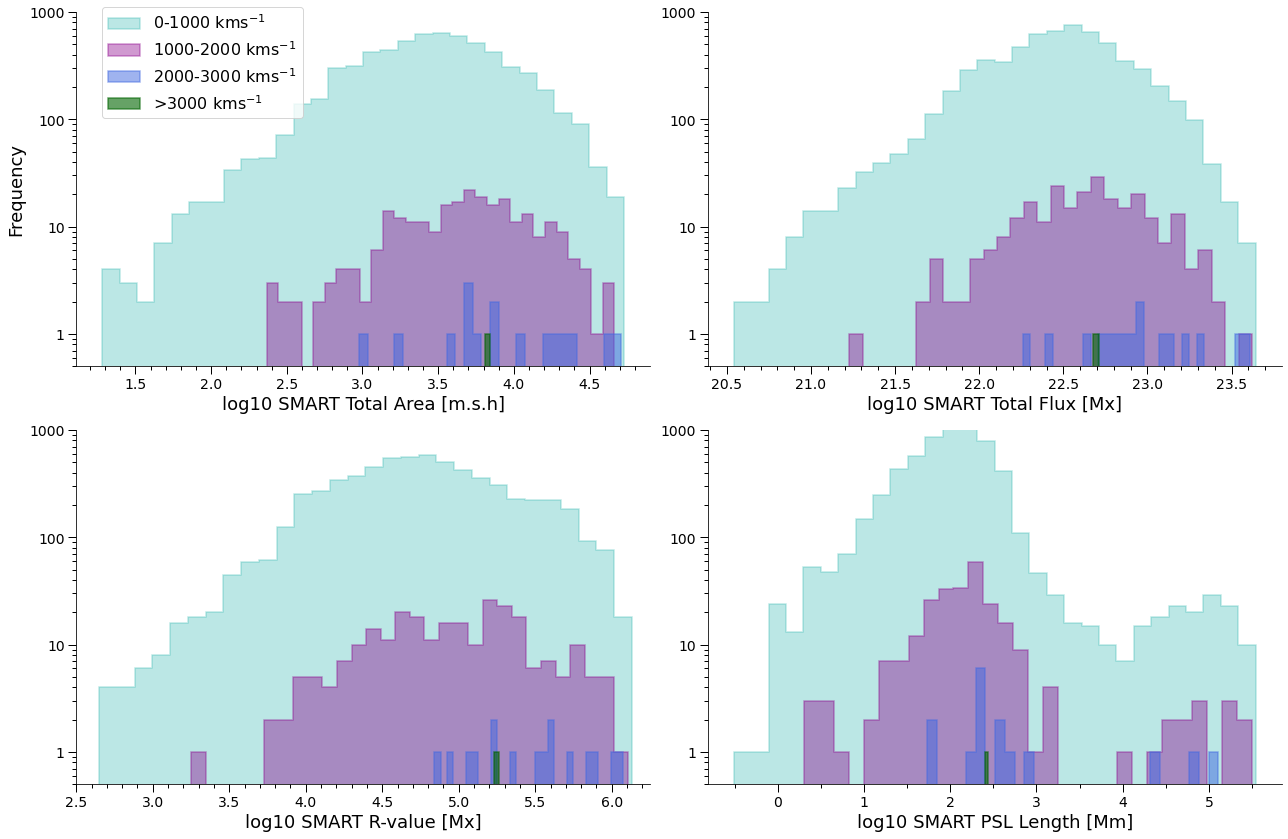

In [7]:
# Plotting CME step-hists
fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12), sharey='row', facecolor='white')
fig1.subplots_adjust(wspace=0.15)

# Sunspot area with relation to CME speed 
na, ba, pa = ax1.hist(np.log10(s1.smart_total_area), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax1.hist(np.log10(s2.smart_total_area), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax1.hist(np.log10(s3.smart_total_area), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax1.hist(np.log10(s4.smart_total_area), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')


ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.legend(loc=[0.045,0.70], fontsize=16)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


# Total flux with relation to CME speed
na, ba, pa = ax2.hist(np.log10(s1.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax2.hist(np.log10(s2.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax2.hist(np.log10(s3.smart_total_flux), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax2.hist(np.log10(s4.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax2.set_yscale('log')
#ax2.set_xlim([2.5,6.25])
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=18)
#ax2.legend(loc=[0.05,0.70], fontsize=16)

ax2.yaxis.set_tick_params(labelleft=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


# R-value with relation to CME speed
na, ba, pa = ax3.hist(np.log10(s1.smart_r_value), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax3.hist(np.log10(s2.smart_r_value), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax3.hist(np.log10(s3.smart_r_value), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax3.hist(np.log10(s4.smart_r_value), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax3.set_yscale('log')
ax3.set_xlim([2.5,6.25])
ax3.set_ylim([0.5,1000])
ax3.set_yticks([1, 10, 100, 1000])
ax3.set_yticklabels(['1', '10', '100', '1000'])

ax3.set_xlabel('log10 SMART R-value [Mx]', fontsize=18)
#ax3.legend(loc=[0.05,0.70], fontsize=16)

ax3.yaxis.set_tick_params(labelleft=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)

ax3.xaxis.set_minor_locator(MultipleLocator(0.1))
ax3.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax3.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)


# WLSG with relation to CME speed
na, ba, pa = ax4.hist(np.log10(s12.smart_psl_length), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax4.hist(np.log10(s22.smart_psl_length), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax4.hist(np.log10(s32.smart_psl_length), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax4.hist(np.log10(s42.smart_psl_length), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax4.set_yscale('log')
#ax4.set_xlim([2.5,6.25])
ax4.set_ylim([0.5,1000])
ax4.set_yticks([1, 10, 100, 1000])
ax4.set_yticklabels(['1', '10', '100', '1000'])

ax4.set_xlabel('log10 SMART PSL Length [Mm]', fontsize=18)
#ax4.legend(loc=[0.05,0.70], fontsize=16)

ax4.yaxis.set_tick_params(labelleft=True)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)

ax4.xaxis.set_minor_locator(MultipleLocator(0.5))
ax4.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax4.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

plt.tight_layout()
#plt.savefig('speed_step.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

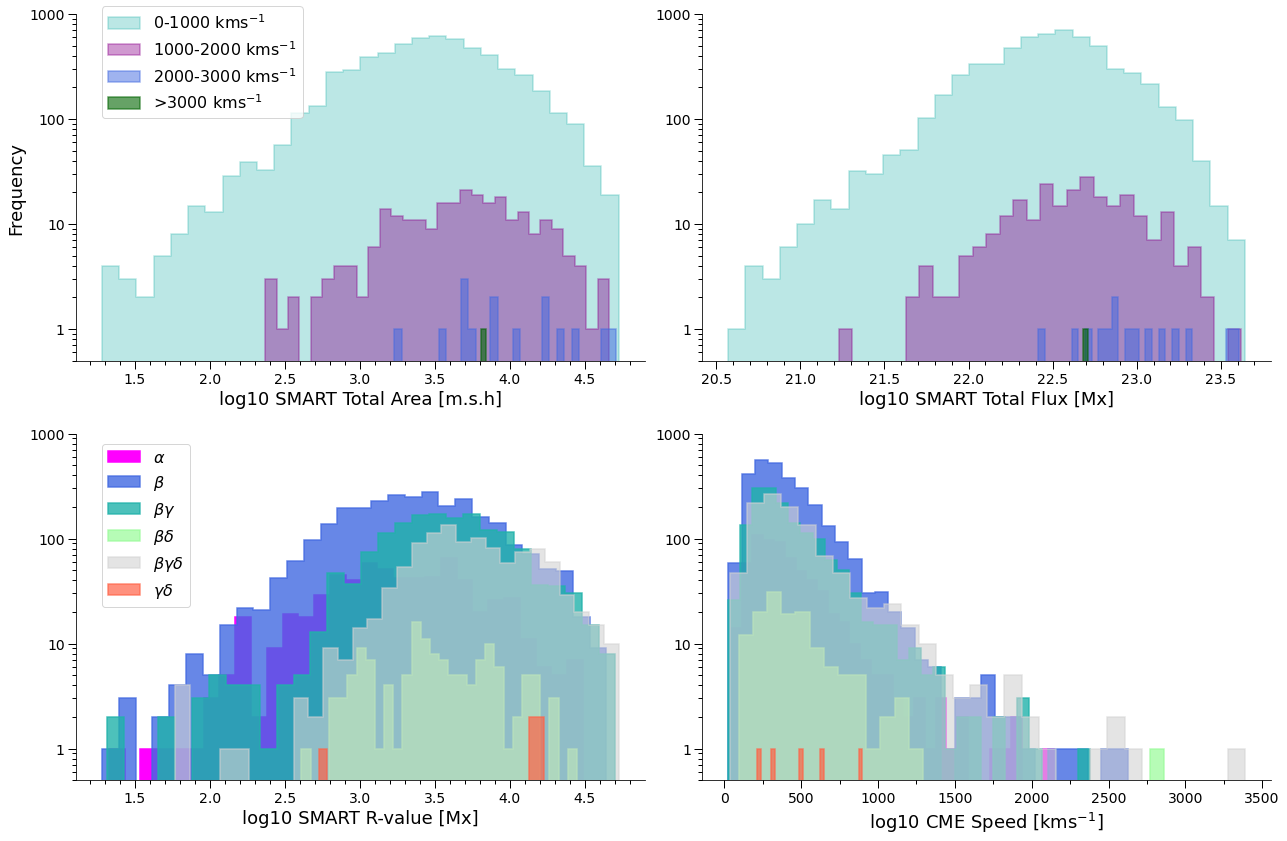

In [12]:
# Plotting CME step-hists
fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12), sharey='row', facecolor='white')
fig1.subplots_adjust(wspace=0.15)

# Sunspot area with relation to CME speed 
na, ba, pa = ax1.hist(np.log10(s1.smart_total_area), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax1.hist(np.log10(s2.smart_total_area), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax1.hist(np.log10(s3.smart_total_area), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax1.hist(np.log10(s4.smart_total_area), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')


ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.legend(loc=[0.045,0.70], fontsize=16)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


# Total flux with relation to CME speed
na, ba, pa = ax2.hist(np.log10(s1.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax2.hist(np.log10(s2.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax2.hist(np.log10(s3.smart_total_flux), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax2.hist(np.log10(s4.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax2.set_yscale('log')
#ax2.set_xlim([2.5,6.25])
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=18)
#ax2.legend(loc=[0.05,0.70], fontsize=16)

ax2.yaxis.set_tick_params(labelleft=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


# R-value with relation to CME speed
n1, b1, p1 = ax3.hist(np.log10(a.smart_total_area), 30, histtype='stepfilled',
                         ec='fuchsia', fc='fuchsia', lw=1.5, alpha=1, label=r'$\alpha$')
n2, b2, p2 = ax3.hist(np.log10(b.smart_total_area), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax3.hist(np.log10(bg.smart_total_area), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax3.hist(np.log10(bd.smart_total_area), 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax3.hist(np.log10(bgd.smart_total_area), 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')
n6, b6, p6 = ax3.hist(np.log10(gd.smart_total_area), 30, histtype='stepfilled',
                         ec='tomato', fc='tomato', lw=1.5, alpha=0.7, label=r'$\gamma \delta$')

ax3.set_yscale('log')
ax3.set_ylim([0.5,1000])
ax3.set_yticks([1, 10, 100, 1000])
ax3.set_yticklabels(['1', '10', '100', '1000'])

ax3.set_xlabel('log10 SMART R-value [Mx]', fontsize=18)
ax3.legend(loc=[0.045,0.50], fontsize=16)

ax3.yaxis.set_tick_params(labelleft=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)

ax3.xaxis.set_minor_locator(MultipleLocator(0.1))
ax3.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax3.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)


# Speed
n1, b1, p1 = ax4.hist(a.cme_speed, 30, histtype='stepfilled',
                         ec='fuchsia', fc='fuchsia', lw=1.5, alpha=1, label=r'$\alpha$')
n2, b2, p2 = ax4.hist(b.cme_speed, 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax4.hist(bg.cme_speed, 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax4.hist(bd.cme_speed, 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax4.hist(bgd.cme_speed, 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')
n6, b6, p6 = ax4.hist(gd.cme_speed, 30, histtype='stepfilled',
                         ec='tomato', fc='tomato', lw=1.5, alpha=0.7, label=r'$\gamma \delta$')

ax4.set_yscale('log')
#ax4.set_xlim([2.5,6.25])
ax4.set_ylim([0.5,1000])
ax4.set_yticks([1, 10, 100, 1000])
ax4.set_yticklabels(['1', '10', '100', '1000'])

ax4.set_xlabel('log10 CME Speed [kms$^{-1}$]', fontsize=18)
#ax4.legend(loc=[0.05,0.70], fontsize=16)

ax4.yaxis.set_tick_params(labelleft=True)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)

ax4.xaxis.set_minor_locator(MultipleLocator(250))
ax4.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax4.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

plt.tight_layout()
#plt.savefig('speed_step.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()